In [1]:
import requests
import time
from requests.compat import urljoin
from bs4 import BeautifulSoup
from PIL import Image
import io
import shutil
import os

# Load all Images

In [2]:
dirname = "data"
ims = []
filenames = []
for filename in os.listdir(dirname) :
    filenames.append(filename)
    fullname = os.path.join(dirname, filename)
    #print(fullname)
    im = Image.open(fullname)
    #display(im)
    ims.append(im)
print("images : " + str(len(ims)))

images : 322


# Split to single Digits 1/2/3/4

image size : (100, 40)


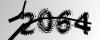

In [70]:
print("image size : " + str(ims[0].size))

rects = [(20,12,34,35),(38,10,53,33),(57,10,71,33),(76,12,91,34)]

def extract_digits( ims, rect ) :
    digits = []
    for im in ims:
        digits.append(im.copy().crop(rect))
    return digits

digit1 = extract_digits( ims, rects[0] )
digit2 = extract_digits( ims, rects[1] )
digit3 = extract_digits( ims, rects[2] )
digit4 = extract_digits( ims, rects[3] )

display( ims[-1] )
display( digit1[-1] )
display( digit2[-1] )
display( digit3[-1] )
display( digit4[-1] )


# Convert RGB -> Grey and make np-Array

In [71]:
import numpy as np

digit1[-1].getbands()

def make_np_greyscale( digit ) :
    np_digit = []
    for im in digit:
        np_digit.append( np.array(im.convert("L").getdata()) )
    return np_digit

np_digit1 = make_np_greyscale( digit1 )
np_digit2 = make_np_greyscale( digit2 )
np_digit3 = make_np_greyscale( digit3 )
np_digit4 = make_np_greyscale( digit4 )

# Cluster Images

In [74]:
from sklearn.cluster import KMeans

#20 clusters : 0...9 / "upware bent","downward bent"

def cluster_kmeans( np_digits, clusters ) :
    kmeans = KMeans(n_clusters=clusters,random_state=22)
    return kmeans.fit( np_digits )

kmeans1 = cluster_kmeans( np_digit1, 10 )

# Show Clusters

In [75]:
def display_imagelist( group_ims ) :
    l = len(group_ims)
    #print(g, l)
    width = group_ims[0].size[0]
    im_concat = Image.new("L", (width * l, group_ims[0].size[1]))
    offset=0
    for im in group_ims:
        im_concat.paste(im, (offset,0))
        offset += width
    display(im_concat)

def group_clusters( digits, labels, filenames, index ) :
    groups = {}
    filelabels = {}
    for im, cluster, filename in zip(digits, labels, filenames):
        if cluster not in groups.keys():
            groups[cluster] = []
            groups[cluster].append(im)
            filelabels[cluster] = []
            filelabels[cluster].append(filename)
        else:
            groups[cluster].append(im)
            filelabels[cluster].append(filename)
    # postprocess filelabels
    for key in filelabels.keys():
        flabels = []
        for lab in filelabels[key]:
            if len(lab) < 10 :
                flabels.append(lab[index])
        if len(flabels) == 0 :
            flabels.append(filelabels[key][0])
            flabels.append(filelabels[key][1])
            flabels.append(filelabels[key][2])
        print(flabels)
        display_imagelist(groups[key])
    return groups

def display_cluster( groups ) :
    for g in groups:
        group_ims = groups[g]
        display_imagelist( group_ims )
    print()

groups1 = group_clusters( digit1, kmeans1.labels_, filenames, 0 )
#display_cluster( groups1 )

kmeans1.predict( [np_digit1[-1]] )

['5', '5', '5', '5']


['4', '4', '4', '4', '4', '4', '4']


['3', '9', '9', '9', '9', '9', '9', '9']


['7', '7', '7', '7']


['0', '0', '0', '0', '0', '0', '0', '0']


['5', '6', '6', '6', '6', '6', '6', '6', '6', '6']


['7', '7']


['3', '3', '3', '3', '3', '3', '3']


['2', '2', '2', '2', '2', '2']


['8', '8', '8', '8']


array([0], dtype=int32)

In [68]:
kmeans2 = cluster_kmeans( np_digit2, 10 )
print(kmeans2)

KMeans(n_clusters=10, random_state=22)


In [69]:
groups2 = group_clusters( digit2, kmeans2.labels_, filenames, 1 )

['6', '6', '6', '6', '6', '6', '6', '5']


['4', '4', '4', '4', '4', '4']


['8', '8', '8', '8', '8', '8', '8']


['5', '5', '5']


['2', '2', '2', '2', '2']


['7', '7', '7', '7', '7', '7', '7']


['3', '3', '3', '3', '3', '3', '3', '3']


['9', '9', '3', '9', '3', '9', '9', '9']


['9', '6', '6', '8', '8']


['0', '0', '0']


In [64]:
kmeans3 = cluster_kmeans( np_digit3, 10 )
print(kmeans3)

KMeans(n_clusters=10, random_state=22)


In [65]:
groups3 = group_clusters( digit3, kmeans3.labels_, filenames, 2 )

['5', '5', '5', '5', '5', '5']


['6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6']


['3', '3', '3', '3', '3', '3', '3']


['9', '9', '9', '9', '9']


['2', '2', '2', '2']


['7', '7', '7', '7', '7', '7', '7', '7']


['9']


['8', '8', '8', '8', '8', '8', '8', '8']


['4', '4', '4', '4', '4', '4']


['0', '0', '0']


In [58]:
kmeans4 = cluster_kmeans( np_digit4, 10 )
print(kmeans4)

KMeans(n_clusters=10, random_state=22)


In [59]:
groups4 = group_clusters( digit4, kmeans4.labels_, filenames, 3 )

['0', '0', '0', '0', '0', '0']


['8', '8', '8', '8', '8']


['3', '3', '3', '3', '3', '3', '3', '3']


['7', '7']


['2', '2', '2', '2', '2', '2', '2', '2', '2', '2']


['5', '5', '5', '5', '5', '5', '5']


['6', '6', '6', '6', '8', '6']


['0', '0', '0']


['9', '9', '9']


['4', '4', '4', '4', '4', '4', '4', '4', '4', '4']
